### Step 2a: Building
#### Document which information you will represent in your data definitions
#### Design data definitions

Before you design data definitions in the code cell below, you must explicitly document here which information in the file you chose to represent and why that information is crucial to the chart or graph that you'll produce when you complete step 2c.

In [1]:
from cs103 import *
from typing import NamedTuple, List
import csv

####################################
# Data Definition for ExperimentData

ExperimentData = NamedTuple('ExperimentData', [('seconds', int), # in range [0, ...)
                                               ('fluroescence_WCS365_1', int), # in range [0, ...)
                                               ('fluroescence_WCS365_2', int), # in range [0, ...)
                                               ('fluroescence_WCS365_3', int), # in range [0, ...)
                                               ('fluroescence_N2C3_1', int), # in range [0, ...)
                                               ('fluroescence_N2C3_2', int), # in range [0, ...)
                                               ('fluroescence_N2C3_3', int)]) # in range [0, ...)

# interp. Respresents experiment data with:
# time ('time'), and
# fluorescence value measured by a plate reader ('fluorescence')

ED1 = ExperimentData(0, 107092, 113579, 108249, 109697, 108118, 111786)
ED2 = ExperimentData(1808, 101094, 106148, 104766, 105205, 102728, 106714)

@typecheck
# template based on Compound
def fn_for_experiment_data(ed: ExperimentData) -> ...:
    return ...(fn_for_seconds(ed.seconds),
               ed.fluorescence_WCS365_1,
               ed.fluroescence_WCS365_2,
               ed.fluroescence_WCS365_3,
               ed.fluroescence_N2C3_1,
               ed.fluroescence_N2C3_2,
               ed.fluroescence_N2C3_2)

# Data Definition for List[ExperimentData]

# List[ExperimentData]
# interp. a list of experiment data

LOC0 = []
LOC1 = [ED1, ED2]

@typecheck
# Template based on Arbitrary-sized and Reference Rule
def fn_for_loed(loed: List[ExperimentData]) -> ...:

    # description of the accumulator
    acc = ... # type: ...
    
    for ed in loed:
        acc = ...(fn_for_experiment_data(ed), acc)
        
    return ...(acc)

# Data Definition for List[str]

# List[str]
# interp. Represents a list of strings

LOI0 = []
LOI1 = ["hello", "Hey"]

@typecheck
# Template based on Arbitrary-sized
def fn_for_los(los: List[str]) -> ...:
    
    # description of the accumulator
    acc = ... #type: ...
    
    for s in los:
        acc = ...(s, acc)
    
    return ...(acc)


/opt/conda/lib/python3.9/site-packages/_distutils_hack/__init__.py:36: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


### Step 2b and 2c: Building
#### Design a function to read the information and store it as data in your program
#### Design functions to analyze the data


Complete these steps in the code cell below. You will likely want to rename the analyze function so that the function name describes what your analysis function does.

Unless approved by your project TA, you **cannot** use libraries such as `numpy` or `pandas`. The project is meant as a way for you to demonstrate your knowledge of the learning goals in this course. While it is convinent to use external libraries, it will do all the work and will not help us gauge your mastery of the concepts.

You also cannot use built in list functions (e.g., `sum` or `average`) when writing code to do your substantial computation. Normally we encourage you to make use of what is already available but in this case, the final project involves demonstrating skills from class (e.g., how to work with a list). Using pre-built functions for this does not enable you to demonstrate what you know.

If you wish to change your project idea, you must **first** obtain permission from your TA. When contacting your TA, please provide a valid reason for why you want to change your project. Each time you change your topic idea, your TA will have to evaluate it to see if it will meet all of the project requirements. This is non-trivial task during one of the busiest times of the semester. As such, the deadline for project idea changes will be 3 business days before the deadline. Note that the deliverable deadline will not be extended and there is no compensation for the time you spent on the previous idea.

In [2]:
###########
# Functions for read and helpers

@typecheck
def convert_loi(los: List[str]) -> List[int]:
    """
    Takes a list of strings containing digits and
    returns the according integer values as a list
    """
    # return [0] #stub
    # Template based on List[str]
    
    # acc stores the result so far
    acc = []      # type: List[int]
    
    for s in los:
        int_value = parse_int(s)
        acc.append(int_value)

    return acc

@typecheck
def parse_seconds(s: str) -> int:
    """
    Takes a string representing time in ISO 8601 format (e.g. "0:00:00") and
    returns the time in seconds
    """
    # return 0 #stub
    # Template based on Reference Rule
    
    los = s.split(":")
    loi = convert_loi(los)
    time_in_seconds = loi[0] * 3600 + loi[1] * 60 + loi[2]
    
    return time_in_seconds
    
@typecheck
def read(filename: str) -> List[ExperimentData]:
    """    
    Reads information from the specified file and 
    returns a list of experiment data
    with all columns except for Temperature (row[1])
    Assumes that data cannot be missing
    """
    # return []  #stub
    # Template from HtDAP
    
    # loed contains the result so far
    loed = [] # type: List[ExperimentData]

    with open(filename) as csvfile:
        
        reader = csv.reader(csvfile)
        next(reader) # skip first header line
        next(reader) # skip second header line
        next(reader) # skip third header line
        
        for row in reader:
            # you may not need to store all the rows, and you may need
            # to convert some of the strings to other types
            ed = ExperimentData(parse_seconds(row[0]),
                                parse_int(row[2]),
                                parse_int(row[3]),
                                parse_int(row[4]),
                                parse_int(row[5]),
                                parse_int(row[6]),
                                parse_int(row[7]))
            loed.append(ed)
    
    return loed

# Begin testing
start_testing()

# Examples and tests for convert_loi
expect(convert_loi(["0", "0", "0"]), [0, 0, 0])  
expect(convert_loi(["0", "30", "08"]), [0, 30, 8])

# Examples and tests for parse_seconds
expect(parse_seconds("0:00:00"), 0)
expect(parse_seconds("0:30:08"), 1808)

# Examples and tests for read
expect(read('testfile_empty.csv'), [])
expect(read('testfile_small1.csv'), [ED1])
expect(read('testfile_small2.csv'), [ED1, ED2])

# Show testing summary
summary()

7 of 7 tests passed


In [3]:
#############################################################
# Functions for converting fluorescence to O.D. with WCS365

@typecheck
def get_avg_triplicate(batch1: int, batch2: int, batch3: int) -> float:
    """
    Takes three integer values and returns the average
    """
    # return 0.00 #stub
    return (batch1 + batch2 + batch3) / 3

@typecheck
def get_avg_for_WCS365(ed: ExperimentData) -> float:
    """ 
    Given experiment data,
    finds the average fluorescence reading 
    for WCS365-mTq bacteria competed with WCS365 bacteria
    """
    # return 0.00 #stub
    # Template based on Experiment Data
    return get_avg_triplicate(ed.fluroescence_WCS365_1,
                              ed.fluroescence_WCS365_2,
                              ed.fluroescence_WCS365_3)

@typecheck
def get_od_for_WCS365(avg_fluorescence: float) -> float:
    """
    Given a float = x
    Returns 8E-07x - 0.1612
    """
    # return 0.00 #stub
    x = avg_fluorescence
    return 8 * 10**-7 * x - 0.1612

@typecheck
def get_lood_for_WCS365(loed: List[ExperimentData]) -> List[float]:
    """
    Given a list of experiment data,
    converts the fluorescence data to average optical densities
    for WCS365-mTq competed with WCS365
    If the given list is empty, returns an empty list
    """
    # return [] #stub
    # Template based on List[ExperimentData] and Reference Rule

    # acc stores the list of optical densities seen in the list so far
    acc = [] # type: List[float]
    
    for ed in loed:
        avg_fluorescence = get_avg_for_WCS365(ed)
        od = get_od_for_WCS365(avg_fluorescence)
        acc.append(od)
        
    return acc

# Functions for converting fluorescence to O.D. with N2C3

@typecheck
def get_avg_for_N2C3(ed: ExperimentData) -> float:
    """
    Given experiment data, 
    finds the average fluorescence reading
    for WCS365-mTq bacteria competed with N2C3 bacteria
    """
    # return 0.00 #stub
    # Template based on Experiment Data
    return get_avg_triplicate(ed.fluroescence_N2C3_1,
                              ed.fluroescence_N2C3_2,
                              ed.fluroescence_N2C3_3)

@typecheck
def get_od_for_N2C3(avg_fluorescence: float) -> float:
    """
    Given a float = x
    Returns 1E-06x - 0.1904
    """
    # return 0.00 #stub
    x = avg_fluorescence
    return 10**-6 * x - 0.1904

@typecheck
def get_lood_for_N2C3(loed: List[ExperimentData]) -> List[float]:
    """
    Given a list of experiment data,
    converts the fluorescence data to average optical densities
    for WCS365-mTq competed with N2C3
    If the given list is empty, returns an empty list
    """
    # return [] #stub
    # Template based on List[ExperimentData] and Reference Rule

    # acc stores the list of optical densities seen in the list so far
    acc = [] # type: List[float]
    
    for ed in loed:
        avg_fluorescence = get_avg_for_N2C3(ed)
        od = get_od_for_N2C3(avg_fluorescence)
        acc.append(od)
        
    return acc

@typecheck
def get_lot(loed: List[ExperimentData]) -> List[float]:
    """
    Given a list of experiment data,
    returns a list of time values (in seconds)
    If the given list is empty, returns an empty list
    """
    # return [] #stub
    # Template based on List[ExperimentData]
    
    # acc stores the time values seen in the list so far
    acc = [] # type: List[float]
    
    for ed in loed:
        time = ed[0]
        acc.append(time)
        
    return acc
    
start_testing()

# Examples and tests for avg_triplicate
expect(get_avg_triplicate(107092, 113579, 108249), (107092+113579+108249)/3)
expect(get_avg_triplicate(107092, 107092, 107092), 107092)
expect(get_avg_triplicate(0,108118,111786), (0+108118+111786)/3)
expect(get_avg_triplicate(0, 0, 0), 0/3)

# Examples and tests for get_avg_for_WCS365
expect(get_avg_for_WCS365(ED1), (107092+113579+108249)/3)
expect(get_avg_for_WCS365(ED2), (101094+106148+104766)/3)

# Examples and tests for get_od_for_WCS365
expect(get_od_for_WCS365(0), -0.1612)
expect(get_od_for_WCS365(105205), 105205 * 8 * 10**-7 - 0.1612)

# Examples and tests for get_lood_for_WCS365
expect(get_lood_for_WCS365([]), [])
expect(get_lood_for_WCS365([ED1]), [(107092+113579+108249)/3 * 8 * 10**-7 - 0.1612])
expect(get_lood_for_WCS365([ED1, ED2]), [(107092+113579+108249)/3 * 8 * 10**-7 - 0.1612,
                                         (101094+106148+104766)/3 * 8 * 10**-7 - 0.1612])

# Examples and tests for get_avg_for_N2C3
expect(get_avg_for_N2C3(ED1), (109697+108118+111786)/3)
expect(get_avg_for_N2C3(ED2), (105205+102728+106714)/3)

# Examples and tests for get_od_for_N2C3
expect(get_od_for_N2C3(0), -0.1904)
expect(get_od_for_N2C3(105205), 105205 * 10**-6 -0.1904)

# Examples and tests for get_lood_for_N2C3
expect(get_lood_for_N2C3([]), [])
expect(get_lood_for_N2C3([ED1]), [(109697+108118+111786)/3 * 10**-6 -0.1904])
expect(get_lood_for_N2C3([ED1, ED2]), [(109697+108118+111786)/3 * 10**-6 -0.1904,
                                       (105205+102728+106714)/3 * 10**-6 -0.1904])

# Examples and tests for get_lot
expect(get_lot([]), [])
expect(get_lot([ED1]), [0])
expect(get_lot([ED1, ED2]), [0, 1808])

summary()

21 of 21 tests passed


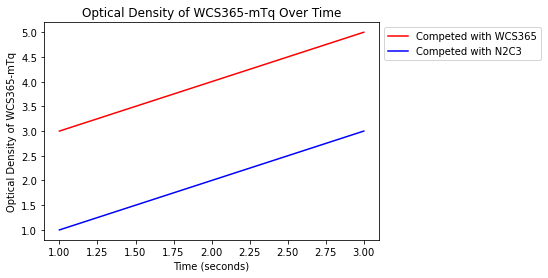

1 of 1 tests passed


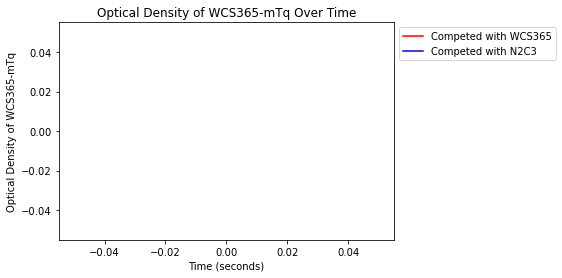

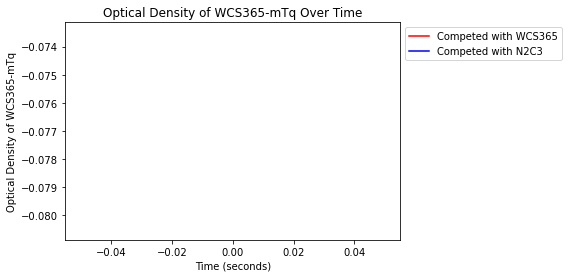

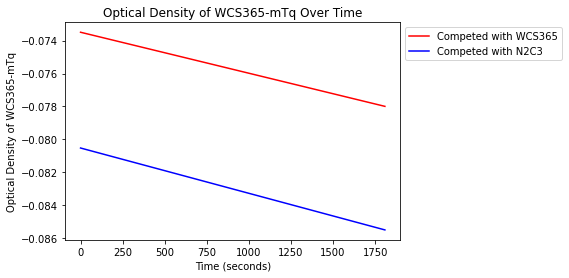

3 of 3 tests passed


In [14]:
###############
# Function for plot
from matplotlib import pyplot as pyplot

@typecheck
def plot_od_by_lot(lood_for_WCS365: List[float], lood_for_N2C3: List[float], lot: List[int]) -> None:
    """
    Visualizes the optical density of WCS365-mTq bacteria over time
    competed with WCS365 or N2C3 bacteria, with
    x-axis representing time in seconds, and
    y-axis representing the optical density of WCS365-mTq
    """
    # return None #stub
    # Template based on Visualization
    
    pyplot.xlabel("Time (seconds)")
    pyplot.ylabel("Optical Density of WCS365-mTq")
    pyplot.title("Optical Density of WCS365-mTq Over Time")
    
    p1 = pyplot.plot(lot, lood_for_WCS365)
    p2 = pyplot.plot(lot, lood_for_N2C3)
    
    pyplot.setp(p1, color='red', label="Competed with WCS365")
    pyplot.setp(p2, color='blue', label="Competed with N2C3")
    pyplot.legend(bbox_to_anchor=(1,1), loc=2)
    pyplot.show()
    return None

start_testing()

expect(plot_od_by_lot([3.0, 4.0, 5.0], [1.0, 2.0, 3.0], [1, 2, 3]), None)

summary()

# Main function
from matplotlib import pyplot as pyplot

@typecheck
def main(filename: str) -> None:
    """
    Reads the file from given filename,
    converts the fluorescence data to a list of average optical densities of WCS365-mTq
    (when competed with WCS365 or N2C3 bacteria), and
    visualizes the results as a line graph
    """
    # Template from HtDAP, based on function composition 
    
    loed = read(filename)
    
    lood_for_WCS365 = get_lood_for_WCS365(loed)
    lood_for_N2C3 = get_lood_for_N2C3(loed)
    lot = get_lot(loed)
    
    plot_od_by_lot(lood_for_WCS365, lood_for_N2C3, lot)
    
    return None

start_testing()

expect(main('testfile_empty.csv'), None)
expect(main('testfile_small1.csv'), None)
expect(main('testfile_small2.csv'), None)

summary()

### Final Graph/Chart

Now that everything is working, you **must** call `main` on the intended information source in order to display the final graph/chart:

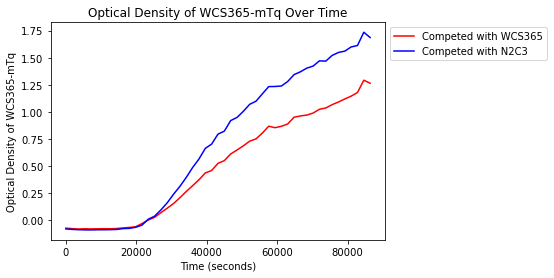

In [15]:
main('mini_competitions_N2C3.csv')